In [1]:
%run data_preprocessing.ipynb

19
10
13
18
20
21
9
{0: [13, 7, 13, 14, 13, 10, 5, 4, 3, 2, 2, 0, 4, 12, 13, 14, 5, 3, 10, 9, 14, 10, 1, 2, 4, 7, 26, 4, 12, 12, 23, 22, 27, 10, 12, 17, 44, 3, 4, 19, 7, 16, 9, 42, 57, 14, 14, 18, 17, 16, 18, 23, 4, 19, 5, 2, 18, 8, 6, 6, 3, 5, 4, 4, 4, 4, 9, 21, 19, 5, 19, 16, 33, 11, 11, 11, 66, 11, 15, 5, 13, 14, 4, 4, 3, 1, 3, 1, 3, 2, 4, 1, 0, 21, 20, 20, 20, 39, 12, 11, 5, 4, 22, 13, 13, 13, 15, 8, 11, 8, 12, 16, 16, 7, 4, 5, 4, 5, 5, 6, 2, 3, 7, 14, 16, 8, 8, 14, 8, 10, 11, 9, 150, 9, 7, 10, 14, 12, 166, 6, 5, 11, 1, 5, 6, 7, 4, 1, 2, 2, 1, 6, 0, 16, 14, 9, 19, 11, 8, 9, 21, 33, 31, 30, 65, 73, 45, 64, 61, 90, 66, 51, 26, 15, 22, 20, 12, 7, 7, 10, 8, 8, 99, 59, 55, 43, 21, 14, 21, 26, 25, 26, 26, 38, 38, 35, 24, 15, 14, 18, 11, 12, 11, 8, 17, 16, 21, 12, 8, 20, 47, 66, 51, 67, 46, 48, 11, 14, 12, 18, 15, 25, 20, 17, 24, 15, 20, 16, 17, 11, 9, 16, 15, 12, 14, 17, 20, 18, 16, 14, 17, 14, 65, 63, 37, 57, 44, 28, 9, 5, 7, 5, 8, 5, 6, 5, 11, 10, 9, 6, 7, 10, 11, 10, 8, 0, 5, 6, 9, 7,

[([833.0, 2806.0, 6484.0, 6839.0], (1, 312.0, 2)), ([2806.0, 6484.0, 6839.0, 0.0], (1, 87.0, 1)), ([6484.0, 6839.0, 0.0, 312.0], (1, 67.0, 1)), ([6839.0, 0.0, 312.0, 87.0], (1, 52.0, 1)), ([0.0, 312.0, 87.0, 67.0], (1, 41.0, 1)), ([312.0, 87.0, 67.0, 52.0], (1, 25.0, 1)), ([87.0, 67.0, 52.0, 41.0], (1, 325.0, 2)), ([67.0, 52.0, 41.0, 25.0], (1, 1166.0, 2)), ([52.0, 41.0, 25.0, 325.0], (1, 3659.0, 2)), ([41.0, 25.0, 325.0, 1166.0], (1, 14591.0, 2)), ([25.0, 325.0, 1166.0, 3659.0], (1, 4546.0, 2)), ([325.0, 1166.0, 3659.0, 14591.0], (1, 314.0, 2)), ([1166.0, 3659.0, 14591.0, 4546.0], (1, 374.0, 2)), ([3659.0, 14591.0, 4546.0, 314.0], (1, 86.0, 1)), ([14591.0, 4546.0, 314.0, 374.0], (1, 68.0, 1)), ([4546.0, 314.0, 374.0, 86.0], (1, 69.0, 1)), ([314.0, 374.0, 86.0, 68.0], (1, 0.0, 0)), ([374.0, 86.0, 68.0, 69.0], (1, 0.0, 0)), ([86.0, 68.0, 69.0, 0.0], (1, 512.0, 2)), ([68.0, 69.0, 0.0, 0.0], (1, 1041.0, 2)), ([69.0, 0.0, 0.0, 512.0], (1, 2136.0, 2)), ([0.0, 0.0, 512.0, 1041.0], (1, 4003.0

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot
import math
import pmdarima as pm
from scipy import stats
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
from scipy.special import inv_boxcox

### Combining Auto Arima with Prophet
Results
1. Auto-Arima achieved 68% accuracy rate when predicting the states of the next two months
2. Combined with prophet, achieves around 67-77% accuracy (best recorded 79% accuracy)

In [176]:
country_monthly_thresholds = monthly_thresholds[1]
def compare_predicted_state_to_ground_truth(predicted_no_cases, ground_truth, threshold=country_monthly_thresholds):
    predicted_state = find_state(threshold, predicted_no_cases)
    if predicted_state != ground_truth:
        print("Predicted: {0} Correct: {1}".format(predicted_state, ground_truth))
    return int(predicted_state == ground_truth)

In [177]:
#Testing Autoarima On Monthly Data

#lmbda is the value to add to the training_data to make it non-negative - it's applied manually to the df
#which will be used by prophet and automatically in the pipeline defined by the Auto-Arima model
lmbda=1e-6

month_data_burkina = month_data.loc[month_data["Country"] == 1]

#Apply Box-Cox transformation to prophet data since that is not gonna go through the pipeline of auto_arima
month_data_burkina_prophet = month_data_burkina.copy()

# X_prophet = month_data_burkina_prophet["Cases"].values
# X_prophet = stats.boxcox(X_prophet, lmbda=lmbda)
# prophet fits a more stable model when we plot log(x+1) of the data
std = month_data_burkina_prophet["Cases"].std()
month_data_burkina_prophet["Cases"] = month_data_burkina_prophet["Cases"].apply(lambda x: math.log(x+1))
month_data_burkina_prophet = month_data_burkina_prophet.rename(columns={"Date":"ds", "Cases":"y"})
month_data_burkina_prophet = month_data_burkina_prophet.drop(columns=["State", "Country"])

#Note that we will apply a BoxCox transformation on the data but will integrate it into the pipeline
X = month_data_burkina["Cases"].values
separation = int(len(month_data_burkina) * 0.8)

#note must be numpy arrays
train_data = X[:separation]
test_data = X[separation:]
test_states = month_data_burkina[separation:]["State"]
test_states = test_states.reset_index(drop=True)
burkina_monthly_thresholds = monthly_thresholds[1]
print(monthly_thresholds[5])

[2.8999999999999995, 10.399999999999999]


In [178]:
fit = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=lmbda)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=12))
])

fit.fit(train_data)
fit.summary()


Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,0,1,12) [intercept=True]; AIC=763.049, BIC=786.232, Time=0.723 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=True]; AIC=842.549, BIC=848.345, Time=0.008 seconds
Fit ARIMA(1,0,0)x(1,0,0,12) [intercept=True]; AIC=775.548, BIC=787.139, Time=0.124 seconds
Fit ARIMA(0,0,1)x(0,0,1,12) [intercept=True]; AIC=796.260, BIC=807.851, Time=0.087 seconds
Fit ARIMA(0,0,0)x(0,0,0,12) [intercept=False]; AIC=1035.298, BIC=1038.196, Time=0.006 seconds
Fit ARIMA(2,0,2)x(0,0,1,12) [intercept=True]; AIC=764.308, BIC=784.593, Time=0.568 seconds
Fit ARIMA(2,0,2)x(1,0,0,12) [intercept=True]; AIC=773.091, BIC=793.375, Time=0.708 seconds
Near non-invertible roots for order (2, 0, 2)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(2,0,2)x(2,0,1,12) [intercept=True]; AIC=764.530, BIC=790.611, Time=1.412 seconds
Near non-invertible roots for order (2, 0, 2)(2, 0, 1, 12); setting

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  134
Model:             SARIMAX(2, 0, 3)x(1, 0, [1], 12)   Log Likelihood                -372.267
Date:                              Thu, 28 May 2020   AIC                            762.534
Time:                                      21:22:47   BIC                            788.615
Sample:                                           0   HQIC                           773.132
                                              - 134                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.4244      2.091      2.116      0.034       0.326       8.523
ar.L1         -1.7558      0.123    -14.293      0.000      -1.997      -1.515
ar.L2         -0.8251      0.123     -6.723      0.000      -1.066      -0.585
ma.L1          1.9934      0.138     14.455      0.000       1.723       2.264
ma.L2          1.3733      0.180      7.621      0.000       1.020       1.727
ma.L3          0.3611      0.079      4.594      0.000       0.207       0.515
ar.S.L12       0.8747      0.054     16.216      0.000       0.769       0.980
ma.S.L12      -0.3815      0.144     -2.649      0.008      -0.664      -0.099
sigma2        14.1135      1.249     11.302      0.000      11.666      16.561
===================================================================================
Ljung-Box (Q):                       26.30   Jarque-Bera (JB):                91.94
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Test 1: 
Combining Prophet with Auto-Arima by making a proporitional adjustment to auto-arima prediction based on the predictions of prophet

/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/amirgirgis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to b

            ds     trend  cap  floor  yhat_lower  yhat_upper  trend_lower  \
0   2006-01-31  1.915859   12      0    4.387225    7.431543     1.915859   
1   2006-02-28  1.876516   12      0    6.024336    9.052497     1.876516   
2   2006-03-31  1.833728   12      0    6.161517    9.127230     1.833728   
3   2006-04-30  1.793085   12      0    5.894690    8.886816     1.793085   
4   2006-05-31  1.751870   12      0    4.066206    6.831103     1.751870   
..         ...       ...  ...    ...         ...         ...          ...   
161 2019-06-30  0.030524   12      0    1.341151    4.261320     0.030524   
162 2019-07-31  0.029704   12      0    1.749916    4.690617     0.029704   
163 2019-08-31  0.028907   12      0    2.059709    5.008783     0.028907   
164 2019-09-30  0.028155   12      0    1.994911    4.987426     0.028155   
165 2019-10-31  0.027399   12      0    1.055290    3.981630     0.027399   

     trend_upper  additive_terms  additive_terms_lower  ...   monthly  \
0 

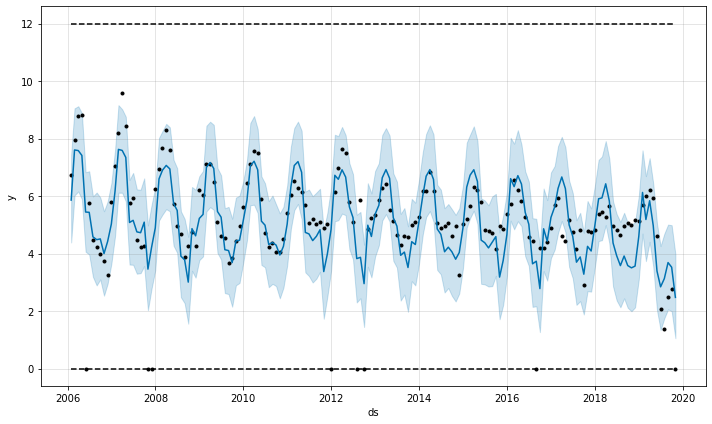

In [169]:
#Before combining Prophet with Auto-Arima, we will see what parameters allow for a good fit on the data
train_prophet = month_data_burkina_prophet[:-2]
train_prophet["floor"] = 0
train_prophet["cap"] = 12
test_prophet = month_data_burkina_prophet[-2:]
test_prophet["floor"] = 0
test_prophet["cap"] = 12

model = Prophet(growth = "logistic", seasonality_mode = "additive", weekly_seasonality=False, \
               changepoint_prior_scale=0.3, yearly_seasonality=False).add_seasonality( 
                                                                    name="monthly",
                                                                    period=30.5,
                                                                    fourier_order=3).add_seasonality(
                                                                    name="yearly",
                                                                    period=365.25,
                                                                    fourier_order=10)

test_prophet = test_prophet.drop(columns=["y"])
test_prophet = test_prophet.reset_index(drop=True)
model.fit(train_prophet)
forecast = model.predict(train_prophet)
fig = model.plot(forecast)
print(forecast)

In [170]:
#a class to handle prophet predicting and fitting which will be used in conjunction with auto_arima
class ProphetTimeStep():
    def __init__(self):
        self.model = None
    
    #TODO: add features to customize prophet model instantiated
    def instantiate_model(self):
        self.model = Prophet()
    
    def fit_model(self, df):
        model = self.instantiate_model()
        self.model.fit(df)
    
    def predict_prophet(self, df, counter):
        df = df[:counter]
        self.fit_model(df)
        future = self.model.make_future_dataframe(2, freq="M")
        forecast = self.model.predict(future)
        #need to inverse the log(x+1) transformation that was applied
        inverse_yhat = forecast["yhat"].apply(lambda x: np.exp(x) + 1)
        #a box-cox was never directly applied on yhat_lower & yhat_upper but since they were derived from yhat
        #inversing them should yield relatively reasonable results
        inverse_yhat_lower = forecast["yhat_lower"].apply(lambda x: np.exp(x)+1)
        inverse_yhat_upper = forecast["yhat_upper"].apply(lambda x: np.exp(x) + 1)
        forecast["yhat"], forecast["yhat_lower"], forecast["yhat_upper"] = inverse_yhat, inverse_yhat_lower,\
                                                                           inverse_yhat_upper
        return forecast[counter:]
    

In [171]:
#A class that will be used to apply statistical significance test at each iteration
#QUESTION: what significance level should the p-value be compared to? Can we make this a learnable parameter?
#Main issue: running this pipeline in parallel with some significance level alpha for our different data streams
#means a false alarm in at least one will be much higher than alpha
class SignificanceTest():
    def __init__(self):
        pass
    
    #previous cases will be the array with the number of cases from previous timesteps
    def calculate_probability_distribution(self, previous_cases):
        sum_cases = sum(previous_cases)
        prob_distribution = previous_cases/sum_cases
        return prob_distribution
    
    #recorded_no_cases is the no_cases at the last most availabe timestep and what the significance level will 
    #determine constitutes a suscpicious peak or not
    #bins has to be quite large since we are going to need to calculate the area thus will increase precision
    def calculate_pvalue(self, prob_distribution, beta=100):
        n, bins, patches = plt.hist(prob_distribution, 
                            bins=beta, 
                            density=True)
        recorded_no_cases = prob_distribution[-1]
        #get bin width
        bin_width = bins[1] - bins[0]
        #the code below will find the index of the first bin value > recorded number of cases
        bin1 = np.searchsorted(bins,recorded_no_cases)
        # sum over number in each bin and mult by bin width, which can be factored out    
        integral = bin_width * sum(n[bin1:])
        return integral
    
    def return_pvalue(self, previous_cases, beta=100):
        prob_distribution = self.calculate_probability_distribution(previous_cases)
        return self.calculate_pvalue(prob_distribution, beta)
    
    #compute an exponentially weighted moving average with a bias correction
    def ewma(self, sequence, beta):
        y_current=(beta*sequence[0])
        for i in range(1, len(sequence)):
            y_current = ((beta*y_current) + (1-beta)*sequence[i])
        return y_current


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[84.99999999999999, 2.0, 66.99999999999997, 67.99999999999997, 83.00000000000001, 136.00000000000003, 300.0000000000001, 374.00000000000017]
p-value: 0.2985074626865674 adjustment: 287.7070312500001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[235.58230063 375.36705745], Expected=[98. 85.]
[66.99999999999997, 67.99999999999997, 83.00000000000001, 136.00000000000003, 300.0000000000001, 374.00000000000017, 99.99999999999999, 86.99999999999997]
p-value: 0.7573529411764705 adjustment: 140.33984375


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[138.05431926 267.38553519], Expected=[176. 115.]
[83.00000000000001, 136.00000000000003, 300.0000000000001, 374.00000000000017, 99.99999999999999, 86.99999999999997, 177.99999999999994, 116.99999999999999]
p-value: 0.6594202898550722 adjustment: 137.88671874999997


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[108.81068503  55.47153055], Expected=[ 63. 124.]
[300.0000000000001, 374.00000000000017, 99.99999999999999, 86.99999999999997, 177.99999999999994, 116.99999999999999, 64.99999999999997, 126.00000000000004]
p-value: 0.6214285714285712 adjustment: 113.375


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[62.86164373 61.52882289], Expected=[ 17. 119.]
[99.99999999999999, 86.99999999999997, 177.99999999999994, 116.99999999999999, 64.99999999999997, 126.00000000000004, 18.999999999999996, 120.99999999999997]
p-value: 0.6478873239436621 adjustment: 92.57031249999999


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[57.93427395 19.41952758], Expected=[115. 121.]
[177.99999999999994, 116.99999999999999, 64.99999999999997, 126.00000000000004, 18.999999999999996, 120.99999999999997, 116.99999999999999, 123.00000000000003]
p-value: 0.6041666666666664 adjustment: 113.625


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[35.95297743 93.74701414], Expected=[219. 235.]
[64.99999999999997, 126.00000000000004, 18.999999999999996, 120.99999999999997, 116.99999999999999, 123.00000000000003, 221.00000000000009, 237.0000000000001]
p-value: 0.39726027397260255 adjustment: 201.75390625000009


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 1 Correct: 2

>Predicted=[174.19194695 133.5866007 ], Expected=[194. 286.]
[18.999999999999996, 120.99999999999997, 116.99999999999999, 123.00000000000003, 221.00000000000009, 237.0000000000001, 196.0, 288.00000000000006]
p-value: 0.33108108108108125 adjustment: 243.12890625000006


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 2 Correct: 1

>Predicted=[333.10487848 177.30545196], Expected=[144. 121.]
[116.99999999999999, 123.00000000000003, 221.00000000000009, 237.0000000000001, 196.0, 288.00000000000006, 145.99999999999997, 123.00000000000003]
p-value: 0.6133333333333334 adjustment: 158.52734375


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[115.91747291  83.49711801], Expected=[103. 144.]
[221.00000000000009, 237.0000000000001, 196.0, 288.00000000000006, 145.99999999999997, 123.00000000000003, 104.99999999999999, 145.99999999999997]
p-value: 0.5460526315789469 adjustment: 138.52734375


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[55.16846155 74.9073124 ], Expected=[160. 149.]
[196.0, 288.00000000000006, 145.99999999999997, 123.00000000000003, 104.99999999999999, 145.99999999999997, 162.00000000000003, 150.99999999999997]
p-value: 0.4935064935064933 adjustment: 149.953125


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[101.13905653  37.15824094], Expected=[173. 169.]
[145.99999999999997, 123.00000000000003, 104.99999999999999, 145.99999999999997, 162.00000000000003, 150.99999999999997, 175.0, 171.00000000000006]
p-value: 0.44871794871794857 adjustment: 165.98437500000003


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 1 Correct: 2
Predicted: 1 Correct: 2

>Predicted=[112.84594839 134.41329559], Expected=[295. 408.]
[104.99999999999999, 145.99999999999997, 162.00000000000003, 150.99999999999997, 175.0, 171.00000000000006, 296.99999999999994, 410.00000000000017]
p-value: 0.25316455696202544 adjustment: 320.3632812500001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



>Predicted=[291.14152595 274.50689393], Expected=[503. 376.]
[162.00000000000003, 150.99999999999997, 175.0, 171.00000000000006, 296.99999999999994, 410.00000000000017, 505.00000000000006, 378.00000000000006]
p-value: 0.2625 adjustment: 394.9531250000001


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 2 Correct: 1
Predicted: 2 Correct: 0

>Predicted=[323.81735101 251.68189102], Expected=[101.   7.]
[175.0, 171.00000000000006, 296.99999999999994, 410.00000000000017, 505.00000000000006, 378.00000000000006, 102.99999999999996, 8.999999999999998]
p-value: 0.9506172839506171 adjustment: 128.53515625


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[46.20328709 94.74076072], Expected=[ 3. 11.]
[296.99999999999994, 410.00000000000017, 505.00000000000006, 378.00000000000006, 102.99999999999996, 8.999999999999998, 5.0, 13.0]
p-value: 0.9390243902439025 adjustment: 39.37890625


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predicted: 1 Correct: 0

>Predicted=[ 42.53994601 102.44271348], Expected=[15.  0.]
[505.00000000000006, 378.00000000000006, 102.99999999999996, 8.999999999999998, 5.0, 13.0, 17.0, 2.0]
p-value: 1.0 adjustment: 14.00390625
Predicted: 1 Correct: 0

>Predicted=[13.84435393 50.48480792], Expected=[ 0. 87.]
Accuracy: 0.676


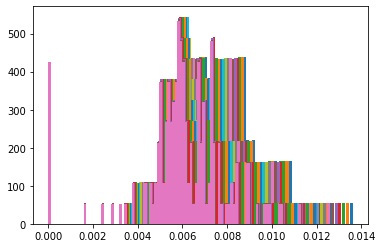

In [181]:
predictions = np.array([])
num_correct = 0

#TODO: make gamma a learnable parameter
gamma = 10
#significance level to compare to
alpha = 0.3
#represents the last n terms that we will use to compute an ewma when determining suspicious peaks
delta = 8
#represents beta in ewma - will determine the size of the moving window average we determine
#for now, size of window =1/(1-0.6) which is 2.5
beta = 0.5
#represents the step taken towards exwa value
mu = 0.3
#adjusts auto_arima prediction by making a proportional step in direction of prophet_pred and evaluates pvalue
#size of step depends on confidence interval of prophet - if prophet is very confident of a prediction (meaning 
#the gap between yhat_lower/upper is quite small), then a large is step is taken and vice versa
def make_adjustment(prophet_preds, auto_arima_pred, pvalue, stats_sig_test, sequence):
    #inverse the log(x+1) initally applied on the data
    sequence = list(map(lambda x: np.exp(x) + 1, sequence))
    print(sequence)
    #compute exponential moving average over last handful of terms to capture rate of change (potentially result
    #or build up of a suscpicious spike)
    exma_seq = stats_sig_test.ewma(sequence, beta)
    print("p-value: {0} adjustment: {1}".format(pvalue, exma_seq))
    rate_to_increment = mu*(1 - pvalue) if pvalue < alpha else 0
    for i in range(len(prophet_preds)):
        proportion = gamma/(prophet_preds.iloc[i]["yhat_upper"]-prophet_preds.iloc[i]["yhat_lower"])
        prophet_pred = prophet_preds.iloc[i]["yhat"]
        difference = prophet_pred - auto_arima_pred[i]
        auto_arima_pred[i] += difference*proportion + (rate_to_increment*exma_seq)
    return auto_arima_pred
        

#predict in waves of 2 e.g. predict at timestep t, t+1, t+2, t+3 then update data to from the newly observed values
# (i.e. actual ground truth labels at previous 4 timesteps) predict at t+4, 5, 6 etc.

#Before we output our final prediction, we will make a step that is inversely proportional to yhat_upper - yhat_lower 
#confidence interval provided by the prophet model. This means if prophet outputs a prediction that it's very
#confident about (meaning the confidence range is low), we will make a large step in the direction of yhat
prophet_model = ProphetTimeStep()
stat_sig_test = SignificanceTest()
for i in range(0,len(test_data),2):
    prophet_preds = prophet_model.predict_prophet(month_data_burkina_prophet, separation+i)
    seq_up_to_point = month_data_burkina_prophet[:separation+i]["y"].values
    pvalue = stat_sig_test.return_pvalue(seq_up_to_point)
    preds = fit.predict(n_periods=2)
    #make a corresponding adjustment
    preds = make_adjustment(prophet_preds, preds, pvalue, stat_sig_test, seq_up_to_point[-delta:])
    predictions = np.append(predictions, preds)
    obs = test_data[i:i+2]
    array = list(range(2))
    correct_states = test_states.loc[i:i+2].values
    #update pipline so that model predicts from newly observed value
    fit.update(obs, maxiter=10)
    correct_array = list(map(lambda x: compare_predicted_state_to_ground_truth(preds[x], correct_states[x]), array))
    num_correct += sum(correct_array)
    print("")
    print('>Predicted={0}, Expected={1}'.format(preds, obs))
accuracy = num_correct/len(test_data)
print("Accuracy: %.3f" % accuracy)

A quick note on exponentially moving averages, given $y_{t}$, an exponential moving average is defined as :

$y_{t}$ = $\beta$$y_{t-1}$ + (1-$\beta$)$\theta_{t}$

$\beta$ is a hyperparameter which can be interpreted as taking the average of 1/(1-$\beta$) previous timesteps. Therefore the closer $\beta$ is to 1, the more values it averages over, e.g. if $\beta$ = 0.5, then equivalent of taking an exponentially moving average over the two previous timesteps.

In the context of using this to help determine and make predict suspicious peak, using a large value of $\beta$ will mean the reuslt will adapt more slowly, thus if we want to pick up early on a sudden suspicious spike, a smaller $\beta$ will probably be more appropriate. The problem with using a smaller value of $\beta$ however will be our predictions may become more susceptible to outliers/more noisy.

Since we will only be taking a weighted average over the last couple of datapoints (around 3 or 4)- we will apply bias correction to make our estimates more accurate.

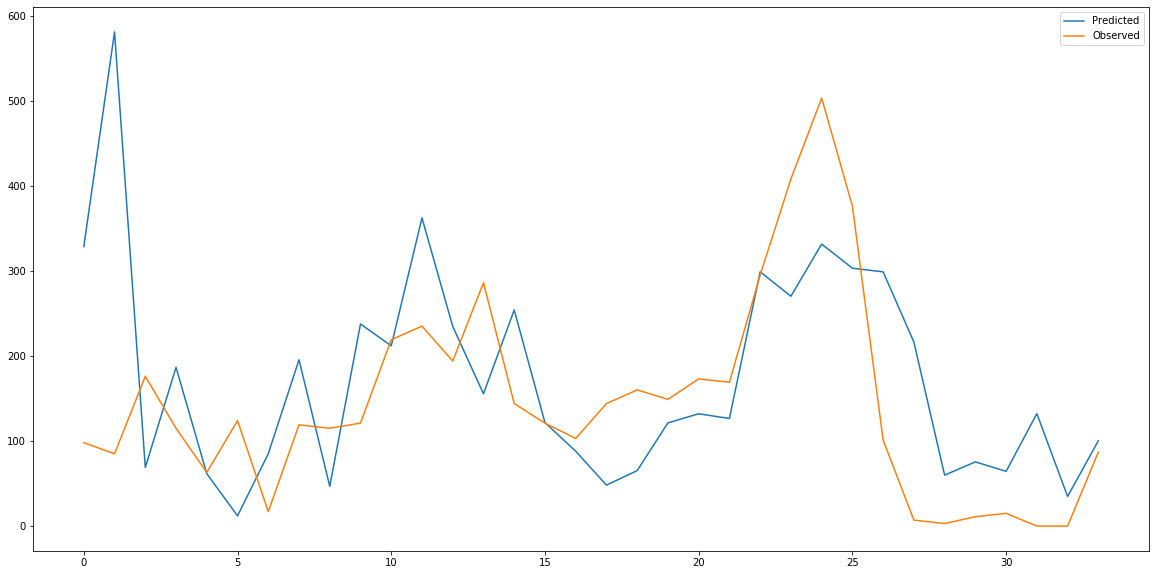

In [173]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.plot(predictions, label="Predicted")
ax.plot(test_data, label="Observed")
ax.legend()